### **Weather Prediction**

### *Importing libraries*

In [2]:
import pandas as pd
import numpy as np

### *Loading Data*

In [3]:
df = pd.read_csv(r'C:\Users\adity\Documents\Machine Learning\Naive_Bays\dataset\seattle-weather.csv')
df.head(10)

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
5,2012-01-06,2.5,4.4,2.2,2.2,rain
6,2012-01-07,0.0,7.2,2.8,2.3,rain
7,2012-01-08,0.0,10.0,2.8,2.0,sun
8,2012-01-09,4.3,9.4,5.0,3.4,rain
9,2012-01-10,1.0,6.1,0.6,3.4,rain


### *Data Exploration*

In [4]:
df.shape 

(1461, 6)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


In [6]:
df.columns

Index(['date', 'precipitation', 'temp_max', 'temp_min', 'wind', 'weather'], dtype='object')

### *Data Cleaning*

In [7]:
df.isnull().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(0)

### *Feature Enginnering*

In [9]:
df['date']

0       2012-01-01
1       2012-01-02
2       2012-01-03
3       2012-01-04
4       2012-01-05
           ...    
1456    2015-12-27
1457    2015-12-28
1458    2015-12-29
1459    2015-12-30
1460    2015-12-31
Name: date, Length: 1461, dtype: object

In [10]:
df['Year'] = pd.DatetimeIndex(df['date']).year
df['Month'] = pd.DatetimeIndex(df['date']).month
df['Day'] = pd.DatetimeIndex(df['date']).day
df.head()

,date,precipitation,temp_max,temp_min,wind,weather,Year,Month,Day
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle,2012,1,1
1,2012-01-02,10.9,10.6,2.8,4.5,rain,2012,1,2
2,2012-01-03,0.8,11.7,7.2,2.3,rain,2012,1,3
3,2012-01-04,20.3,12.2,5.6,4.7,rain,2012,1,4
4,2012-01-05,1.3,8.9,2.8,6.1,rain,2012,1,5


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
precipitation,1461.0,3.029432,6.680194,0.0,0.0,0.0,2.8,55.9
temp_max,1461.0,16.439083,7.349758,-1.6,10.6,15.6,22.2,35.6
temp_min,1461.0,8.234771,5.023004,-7.1,4.4,8.3,12.2,18.3
wind,1461.0,3.241136,1.437825,0.4,2.2,3.0,4.0,9.5
Year,1461.0,2013.498973,1.118723,2012.0,2012.0,2013.0,2014.0,2015.0
Month,1461.0,6.522930,3.449884,1.0,4.0,7.0,10.0,12.0
Day,1461.0,15.729637,8.803105,1.0,8.0,16.0,23.0,31.0


In [12]:
df['weather'].value_counts()

weather
rain       641
sun        640
fog        101
drizzle     53
snow        26
Name: count, dtype: int64

### *Univeriate Analysis*

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

<Figure size 1200x900 with 0 Axes>

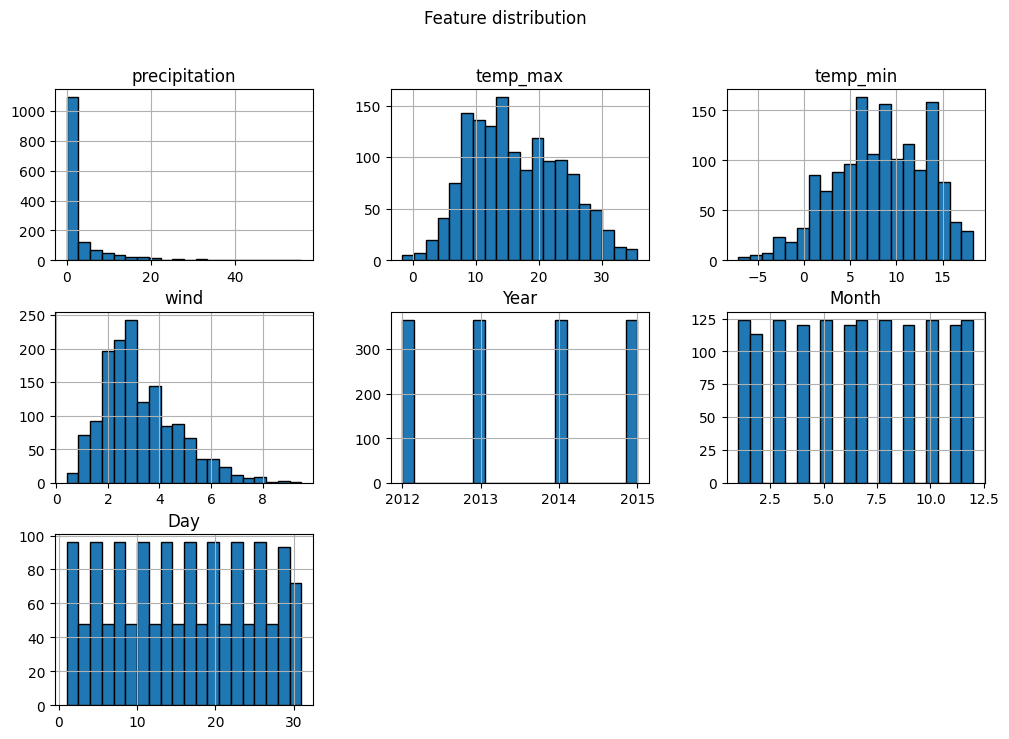

In [25]:
plt.figure(figsize=(12,9))
df.hist(figsize=(12,8), bins=20, edgecolor='black')
plt.grid(False)
plt.suptitle('Feature distribution')
plt.show()

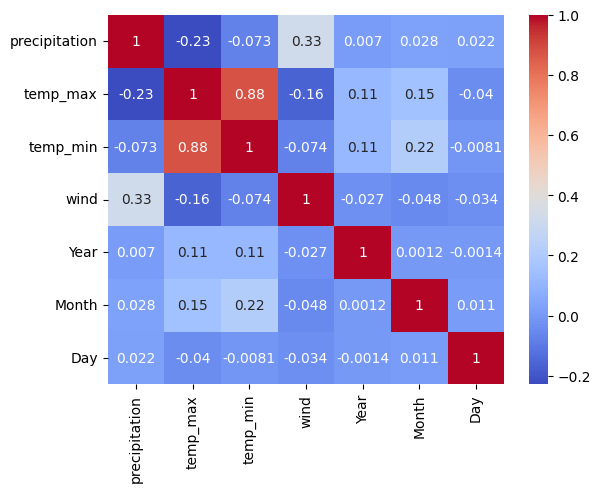

In [ ]:
col = df.drop(columns=['date', 'weather'],axis=1).columns
corr = df[col].corr(method='pearson')
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

### *chosing Feature & Target Variables*

In [16]:
x = df.drop(columns=['date','weather', 'Day'],axis=0)
y = df['weather']

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

### **Splitting the FV & TV into Train & Test*

In [18]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

### *Initializing the Standard-Scaler For StandardScaler*

In [19]:
scale = StandardScaler()
scale_xtrain =scale.fit_transform(X_train)
scale_Xtest = scale.fit_transform(X_test)

### **Initialization of Gaussian Naive Bayes**

In [20]:
model = GaussianNB()
model.fit(scale_xtrain, y_train)

GaussianNB()

### **Predicting The Model**

In [21]:
y_pred = model.predict(scale_Xtest)
y_pred

array(['rain', 'rain', 'rain', 'rain', 'rain', 'rain', 'rain', 'rain',
       'rain', 'rain', 'rain', 'rain', 'rain', 'rain', 'rain', 'rain',
       'rain', 'rain', 'rain', 'rain', 'rain', 'rain', 'rain', 'rain',
       'rain', 'rain', 'rain', 'rain', 'rain', 'rain', 'rain', 'rain',
       'rain', 'rain', 'rain', 'rain', 'rain', 'rain', 'rain', 'rain',
       'rain', 'rain', 'rain', 'rain', 'rain', 'rain', 'rain', 'rain',
       'rain', 'rain', 'rain', 'rain', 'rain', 'rain', 'rain', 'rain',
       'rain', 'rain', 'rain', 'rain', 'rain', 'rain', 'snow', 'rain',
       'rain', 'rain', 'rain', 'rain', 'rain', 'rain', 'rain', 'rain',
       'rain', 'rain', 'rain', 'rain', 'rain', 'rain', 'snow', 'snow',
       'rain', 'rain', 'rain', 'rain', 'rain', 'rain', 'rain', 'rain',
       'rain', 'rain', 'rain', 'rain', 'rain', 'rain', 'snow', 'rain',
       'rain', 'rain', 'rain', 'rain', 'rain', 'rain', 'snow', 'snow',
       'rain', 'rain', 'rain', 'rain', 'rain', 'rain', 'rain', 'rain',
      

### *MOdel Evalution*

In [22]:
accuracy = accuracy_score(y_test, y_pred)*100
print(f"Accuracy:{accuracy:.1f}")

Accuracy:41.0


In [23]:
import warnings
warnings.filterwarnings('ignore')

### *Predicting The New Data*

In [24]:
new_data = [[10, 33, 22, 16, 2025, 5]]
new_data = scale.transform(new_data)
new_pred = model.predict(new_data)
new_pred[0]

np.str_('rain')

## *The Model as Predicited a New Data is "Rain"*